In [3]:
#Para manejos de directorios y archivos
import os

# Computacion numerica en Python, como arrays y matrices
import numpy as np

#Proporciona estrucutra de datos y herramientas para el analisis de datos
import pandas as pd

#Datos en una tabla
from tabulate import tabulate

#Para graficación, visulaizacion de datos
from matplotlib import pyplot
#Superficies en 3D
from mpl_toolkits.mplot3d import Axes3D

#Para separar el 20% y 80%
from sklearn.model_selection import train_test_split

#Visualizar graficas en linea
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
#Lectura del dataset que esta ubicado en Google Drive
dat = pd.read_csv('/content/gdrive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL/datasets/cardio_train.csv', delimiter=';')
dat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
#Columna id eliminada, ya que no es necesaria
dataset=dat.drop(columns=['id'])

Separacion de datos

In [7]:
#Separa el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

#Almacenar en X_test los datos, pero eliminando nuestra 'y' que seria 'cardio'
X_test = test_dataset.drop(['cardio'], axis=1).values

#Almacenar en y_test los datos, pero solo cargando la columna de 'cardio'
y_test = test_dataset['cardio'].values

#Seleccionar las columnaX_train y la columna 'cardio' para el conjunto de entrenmiento
X_train = train_dataset.drop(['cardio'], axis=1).values
y_train = train_dataset['cardio'].values
m_train = len(y_train)


#Imprimir algunos datos:
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], y_train[i]
    ))

#Cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
   17230       1       153       115     120      80       3       3       0         0       1           1
   20257       1       166       103     140      90       3       3       0         0       1           0
   18885       1       162        91     150      90       1       1       0         0       0           1
   20306       1       160        62     130      90       1       1       0         0       0           0
   21987       1       168        72     120      80       3       3       0         0       0           1
   15968       1       162       115     110      70       1       3       0         0       1           1
   14778       2       169        74     100      70       1       1       0         0       1           0
   14562       1       180        

Normalizacion de Caracteristicas

In [9]:
def  featureNormalize(X):
    X_norm = X.copy()

    #Almacena la media y la desviacion etandar de cada columna X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos la media de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    #Si la desviacion estandar es 0, se establece 1
    sigma[sigma == 0] = 1

    #Normalzar los datos
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [10]:
X_norm, mu, sigma= featureNormalize(X_train)

#Imprimir 10 filas de las X_norm de datos
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
  -0.904  -0.733    -1.384     2.838  -0.060  -0.094   2.407   3.103  -0.312    -0.239   0.495
   0.323  -0.733     0.199     2.003   0.078  -0.035   2.407   3.103  -0.312    -0.239   0.495
  -0.233  -0.733    -0.288     1.169   0.147  -0.035  -0.538  -0.395  -0.312    -0.239  -2.020
   0.342  -0.733    -0.531    -0.848   0.009  -0.035  -0.538  -0.395  -0.312    -0.239  -2.020
   1.023  -0.733     0.443    -0.153  -0.060  -0.094   2.407   3.103  -0.312    -0.239  -2.020
  -1.415  -0.733    -0.288     2.838  -0.129  -0.154  -0.538   3.103  -0.312    -0.239   0.495
  -1.897   1.364     0.565    -0.014  -0.198  -0.154  -0.538  -0.395  -0.312    -0.239   0.495
  -1.985  -0.733     1.904     0.334   0.009  -0.035   2.407   3.103  -0.312    -0.239  -2.020
  -0.813   1.364     1.783     0.

In [12]:
#Adicion de columna de '1' al princio de la columna de la matriz X_norm
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.904    -0.733    -1.384   2.838  -0.060  -0.094   2.407   3.103    -0.312  -0.239   0.495
   1.000   0.323    -0.733     0.199   2.003   0.078  -0.035   2.407   3.103    -0.312  -0.239   0.495
   1.000  -0.233    -0.733    -0.288   1.169   0.147  -0.035  -0.538  -0.395    -0.312  -0.239  -2.020
   1.000   0.342    -0.733    -0.531  -0.848   0.009  -0.035  -0.538  -0.395    -0.312  -0.239  -2.020
   1.000   1.023    -0.733     0.443  -0.153  -0.060  -0.094   2.407   3.103    -0.312  -0.239  -2.020
   1.000  -1.415    -0.733    -0.288   2.838  -0.129  -0.154  -0.538   3.103    -0.312  -0.239   0.495
   1.000  -1.897     1.364     0.565  -0.014  -0.198  -0.154  -0.538  -0.395    -0.312  -0.239   0.495
   1.000  -1.985    -0.733     1.904   0.3

Funcion Sigmoide

In [13]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z y convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [16]:
#Valor de la sigmoide que esta en el rango de 0 a 1
print(sigmoid(0))

0.5


In [17]:
#Lista de entrada z y calcula la sigmoide para cada una
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


Descenso por el gradiente

Calculo del Costo

In [18]:
def calcularCosto(theta, X, y):
    #Numero de ejemplos de entrenamiento
    m = y.size

    J = 0

    #Uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Descenso por el gradiente

In [19]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    #Numero de ejemplos de entrenamiento
    m = y.shape[0]

    #Copia de theta para no modificar el vector original
    theta = theta.copy()
    #Almacena el costo de cada irtacion del descenso por el gradiente
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [22]:
#Creacion de columnas de theta ceros
theta = np.zeros(len(X_ready[0]))

#Numero de iteraciones
num_ite = 900
#Tasa de aprendizaje
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("Los valores de theta calculados son:")
print("")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}=> {tht}")

print(f"")
#Ultimo y mejor costo
print(f"con un costo de: { J_historico[-1]} ")

Los valores de theta calculados son:

theta 1=> 0.0053107849871214
theta 2=> 0.37714464756376465
theta 3=> 0.014410471806981495
theta 4=> -0.045797359106876274
theta 5=> 0.2918399403115844
theta 6=> 0.15572019915407026
theta 7=> 0.1442441109348612
theta 8=> 0.3237312490929301
theta 9=> 0.018831706027119303
theta 10=> -0.025047888185411097
theta 11=> -0.02478762328337689
theta 12=> -0.0594798067364427

con un costo de: 0.6277794136160766 


Grafica de la convergencia del costo

Text(0, 0.5, 'Costo J')

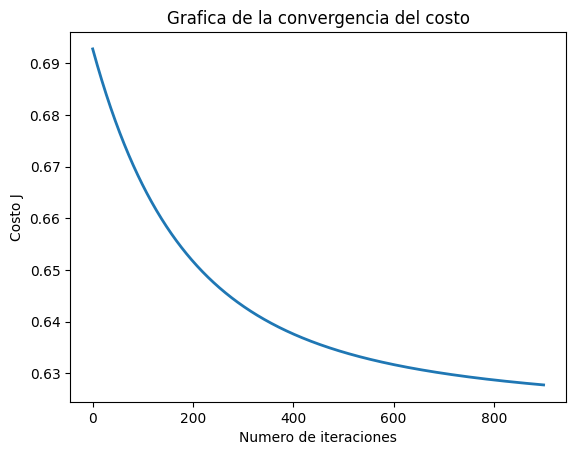

In [23]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Prueba con un ejemplo

In [25]:
X_array = [1,90,1,157,45,120,70,1,1,0,0,1]
X_array_copy = X_array.copy()
#Se normaliza las caracteristicas para la prueba en todas las caracteriticas excepto en la primera entrada
X_array[1:] = (X_array[1:] - mu) / sigma

resultados = sigmoid(np.dot(X_array, theta))

print(f"Una persona con las caracteristicas: {X_array_copy} ")
print(f'Tiene una probabilidad de tener diabetes de: {resultados * 100} %')

print(f"Con valores de theta: { theta }")

Una persona con las caracteristicas: [1, 90, 1, 157, 45, 120, 70, 1, 1, 0, 0, 1] 
Tiene una probabilidad de tener diabetes de: 2.3080436940103835 %
Con valores de theta: [ 0.00531078  0.37714465  0.01441047 -0.04579736  0.29183994  0.1557202
  0.14424411  0.32373125  0.01883171 -0.02504789 -0.02478762 -0.05947981]


Ejemplo de predicciones

In [27]:
nombres_columnas = ['AGE','GENDER','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','ACTIVITY','CARDIO', 'CARDIO(Si/No)']

matriz_datos = np.array([
[50,2,160,62,110,80,1,1,0,0,1],
[62,1,159,68,140,70,2,1,0,0,0],
[58,1,153,78,140,90,2,1,0,0,1],
[46,1,173,64,120,80,3,1,0,0,1],
[46,1,155,58,160,80,1,1,0,0,1],
[60,2,170,69,120,80,1,1,1,1,1],
[52,2,171,98,110,90,1,1,0,0,1],
[52,1,150,63,180,70,2,1,0,0,1],
[59,2,165,65,120,80,1,1,0,0,1],
[64,1,149,50,120,80,2,1,0,0,1],
[54,2,169,55,110,80,1,1,1,0,1],
])

para_tabla = matriz_datos.copy()
#Almacena cada Y predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
#Columna de '1' al principio de la matriz normalizada
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de cada fila de la matriz de datos de prueba normalizada
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

#Array unidimensional
y_pre = np.array(y_pre)

#Si es mayor o igual a 0.5, tiene la enfermedad
y_pre_umbral = (y_pre >= 0.5).astype(int)

#Predicciones calculadas y resultados binarios al conjunto de datos de  prueba original
para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))

#Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas))

  AGE    GENDER    HEIGHT    WEIGHT    AP_HIGH    AP_LOW    CHOLESTEROL    GLUCOSE    SMOKE    ALCOHOL    ACTIVITY     CARDIO    CARDIO(Si/No)
-----  --------  --------  --------  ---------  --------  -------------  ---------  -------  ---------  ----------  ---------  ---------------
   50         2       160        62        110        80              1          1        0          0           1  0.0324481                0
   62         1       159        68        140        70              2          1        0          0           0  0.0662174                0
   58         1       153        78        140        90              2          1        0          0           1  0.0729047                0
   46         1       173        64        120        80              3          1        0          0           1  0.0762845                0
   46         1       155        58        160        80              1          1        0          0           1  0.0315061                0

Validaciones

Normalizacion de X_text

In [28]:
X_norm_test = (X_test- mu) / sigma
#Numero de ejempos de prueba contando la cantidad de filas en la matriz
m_test= len(X_test)

Concadenamos q a la matriz X normalizado del test

In [29]:
#Columna de '1' al principio de la matriz de datos de prueba normalizado para incluir el termino de sesgo
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

#Imprimir todos las X_norm
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000   0.384     1.364     1.783   0.473  -0.060  -0.094  -0.538  -0.395    -0.312  -0.239   0.495
   1.000  -0.273     1.364     1.052   0.821   0.009  -0.094  -0.538  -0.395    -0.312  -0.239   0.495
   1.000  -0.705    -0.733    -0.897  -0.014  -0.060  -0.094  -0.538  -0.395    -0.312  -0.239   0.495
   1.000   1.247    -0.733     4.097   0.404   0.078  -0.035  -0.538   1.354    -0.312  -0.239   0.495
   1.000  -1.388     1.364     0.687   0.480  -0.060  -0.035  -0.538  -0.395    -0.312  -0.239   0.495
   1.000   1.073     1.364    -1.262  -1.266  -0.060  -0.094  -0.538  -0.395    -0.312  -0.239   0.495
   1.000   1.468    -0.733    -0.410  -1.335  -0.198  -0.154   0.934  -0.395    -0.312  -0.239  -2.020
   1.000   0.918    -0.733     0.565  -0.362  -0.060  -0.094  

Calculo de la Y predicha

In [30]:
y_predicha =[]
#Calculo de la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta.T)))

#Array unidimensional
y_predicha = np.array(y_predicha)

#Etiquetas binarias usando el umbral 0.5. mayor a 1, positivo y si es menor sera 0, negativo
y_umbral = (y_predicha >= 0.5).astype(int)

#Imprimir todos las X_norm de datos
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], y_predicha[i], y_umbral[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000   0.384     1.364     1.783   0.473  -0.060  -0.094  -0.538  -0.395    -0.312  -0.239   0.495           0.50              1
   1.000  -0.273     1.364     1.052   0.821   0.009  -0.094  -0.538  -0.395    -0.312  -0.239   0.495           0.48              0
   1.000  -0.705    -0.733    -0.897  -0.014  -0.060  -0.094  -0.538  -0.395    -0.312  -0.239   0.495           0.39              0
   1.000   1.247    -0.733     4.097   0.404   0.078  -0.035  -0.538   1.354    -0.312  -0.239   0.495           0.56              1
   1.000  -1.388     1.364     0.687   0.480  -0.060  -0.035  -0.538  -0.395    -0.312  -0.239   0.495           0.35              0
   1.000   1.073     1.364    -1.262  -1.266  -0.060 

Precision del entrenamiento

In [31]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 64.81 %
